In [1]:
from astropy.io import fits
import numpy as np
from scipy import ndimage 
import matplotlib 
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle, Wedge, Polygon

In [2]:
image_data = fits.getdata('ECAM.2021-02-18T00_49_59.000.fits')

In [3]:
image_data

array([[333, 345, 352, ..., 329, 328, 331],
       [362, 370, 368, ..., 331, 336, 328],
       [366, 367, 369, ..., 334, 330, 336],
       ...,
       [514, 408, 404, ..., 400, 398, 399],
       [511, 413, 410, ..., 401, 400, 400],
       [512, 412, 407, ..., 402, 400, 399]], dtype=uint16)

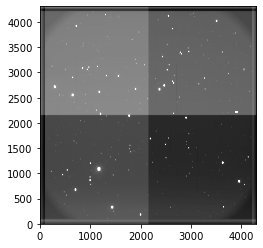

In [4]:
fig, ax1 = plt.subplots(1)
ax1.imshow(image_data, cmap = 'gray', vmin = 300, vmax = 600, origin = 'lower')

In [5]:
f = open('biaslist.txt', 'r')
bias = f.read().splitlines()
f.close

f = open('flatlist.txt', 'r')
flat = f.read().splitlines()
f.close

f = open('rawlist.txt', 'r')
raw = f.read().splitlines()
f.close

<function TextIOWrapper.close()>

In [6]:
print(len(raw))
print(len(flat))
print(len(bias))

69
5
9


In [7]:
i = fits.getdata(flat[0])
#print((i - i)/2)
print(i)

[[323 342 358 ... 340 344 337]
 [376 378 375 ... 335 342 341]
 [379 375 376 ... 345 340 347]
 ...
 [484 382 377 ... 377 373 376]
 [483 382 381 ... 378 378 373]
 [487 387 384 ... 379 372 374]]


In [8]:
def avg_pixel(file_list):
    
    ex = fits.getdata(file_list[0])
    sum_arr = (ex - ex)/2
    
    for i in range(len(file_list)):
        
        openfile = fits.getdata(file_list[i])
        
        sum_arr = sum_arr + openfile
    
    avg = sum_arr / len(file_list)
    
    return avg

In [9]:
masterbias = avg_pixel(bias)
print(masterbias)

[[341.44444444 353.55555556 358.55555556 ... 330.         331.77777778
  332.22222222]
 [370.66666667 370.55555556 369.77777778 ... 333.         331.33333333
  329.66666667]
 [373.         372.77777778 372.88888889 ... 333.         333.22222222
  332.33333333]
 ...
 [526.         419.77777778 415.77777778 ... 408.88888889 408.44444444
  408.33333333]
 [526.33333333 420.33333333 414.66666667 ... 408.11111111 409.22222222
  407.66666667]
 [527.22222222 418.88888889 415.44444444 ... 409.44444444 407.11111111
  407.44444444]]


In [10]:
def flat_field(file_list):
       
    corrected_flatfields = []
    
    for i in range(len(file_list)):
        
        openfile = fits.getdata(file_list[i])
        
        corrected = openfile - masterbias
        
        corrected_flatfields.append(corrected)
    
    sum_arr = (corrected_flatfields[0] - corrected_flatfields[0])
    
    for i in range(len(corrected_flatfields)):
        
        sum_arr = corrected_flatfields[i] + sum_arr
    
    avg = sum_arr / len(corrected_flatfields)
    
    return corrected_flatfields, avg

In [11]:
l = int(len((flat_field(flat)[1]))/2)

print(len((flat_field(flat)[1])))
print(flat_field(flat)[1][l-500:l+500:][0])

print(len(flat_field(flat)[1][l-500:l+500:][0]))

4312
[-67.53333333 -66.88888889 -64.28888889 ... -29.04444444 -16.4
  14.37777778]
4296


In [12]:
x = flat_field(flat)[1]
print(len(x))

4312


In [13]:
# def normalize_center(data):
    
#     half_pixels_each_col = int(len(data[0]))/2
#     arr = []
        
#     for i in range(len(data))
#         middle = data[l - 500:l+500] - data[0][l - 500:l+500]
    
#     norm = np.average(norm)
#     return norm

In [14]:
avg_flat = flat_field(flat)[1]

half_pixels_each_col = int(len(avg_flat)/2)
new_avg_flat = avg_flat[half_pixels_each_col - 500:half_pixels_each_col+500]

final_avg_flat = []

for i in new_avg_flat:
    half_pixels = int(len(i)/2)
    
    middle = i[half_pixels - 500:half_pixels + 500]
    
    final_avg_flat.append(middle)
    
print(np.shape(final_avg_flat))

avg_middle = np.average(final_avg_flat)

normalized_flat = avg_flat / avg_middle

normalized_flat[np.where(normalized_flat == 0)] = 10 ** (-6)  ## Normalized flatfield

(1000, 1000)


In [15]:
corrected_image = (image_data - masterbias) / normalized_flat

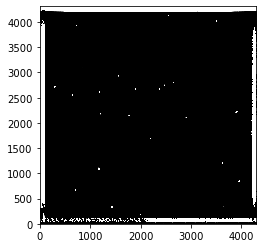

In [16]:
fig, ax1 = plt.subplots(1)
ax1.imshow(corrected_image, cmap = 'gray', vmin = 300, vmax = 600, origin = 'lower')

#fits.writeto('test1.fits', corrected_image)

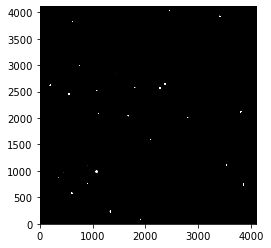

In [17]:
## Removing borders
l1 = int(len(corrected_image))
corrected_image = corrected_image[100:l1 - 100]

borderless_image = []

for i in corrected_image:
    
    l2 = int(len(i))
    borderless = i[100:l2-100]
    
    borderless_image.append(borderless)
    
fig, ax1 = plt.subplots(1)
ax1.imshow(borderless_image, cmap = 'gray', vmin = 300, vmax = 600, origin = 'lower')

In [18]:
# ## Saving all good images

# for i in range(len(raw)):
    
#     image_data = fits.getdata(str(raw[i]))
    
#     corrected_image = (image_data - masterbias) / normalized_flat
    
#     l1 = int(len(corrected_image))
#     corrected_image = corrected_image[100:l1 - 100]

#     borderless_image = []

#     for j in corrected_image:

#         l2 = int(len(j))
#         borderless = j[100:l2-100]

#         borderless_image.append(borderless)

# #     fig, ax1 = plt.subplots(1)
# #     ax1.imshow(borderless_image, cmap = 'gray', vmin = 300, vmax = 600, origin = 'lower')
    
#     borderless_image = np.array(borderless_image)
    
#     fits.writeto(str(raw[i])+'red.fits', borderless_image)

(2400.0, 2500.0)

<Figure size 432x288 with 0 Axes>

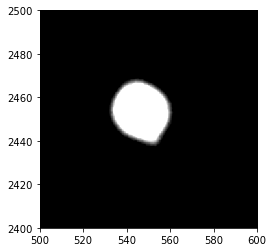

In [19]:
image_data = fits.getdata('ECAM.2021-02-18T02_37_45.000.fitsred.fits')

plt.figure()
fig, ax1 = plt.subplots(1)
ax1.imshow(image_data, cmap = 'gray', vmin = 300, vmax = 600, origin = 'lower')
ax1.set_xlim(500,600)
ax1.set_ylim(2400, 2500)

<ipython-input-58-5094a365db62>:2: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cenx, ceny = ndimage.measurements.center_of_mass(subimage)


<Figure size 432x288 with 0 Axes>

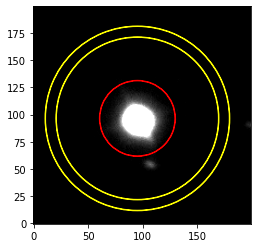

In [58]:
subimage = image_data[2358:2558, 451:651]
cenx, ceny = ndimage.measurements.center_of_mass(subimage)

plt.figure()
fig, ax2 = plt.subplots(1)
ax2.imshow(subimage, cmap = 'gray', vmin = 30, vmax = 300, origin = 'lower')
#ax2.scatter(cenx, ceny, 10)
Aperture = Wedge((cenx, ceny), 35, 0, 360, width = 0.5, color = 'red')
SkyAnnulus1 = Wedge((cenx, ceny), 75, 0, 360, width = 0.5, color = 'yellow')
SkyAnnulus2 = Wedge((cenx, ceny), 85, 0, 360, width = 0.5, color = 'yellow')
ax2.add_patch(Aperture)
ax2.add_patch(SkyAnnulus1)
ax2.add_patch(SkyAnnulus2)

<ipython-input-21-8ef3210bad72>:2: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cenx, ceny = ndimage.measurements.center_of_mass(subimage)


<Figure size 432x288 with 0 Axes>

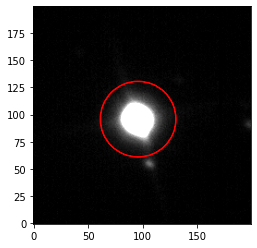

In [21]:
subimage = image_data[2358:2558, 451:651]
cenx, ceny = ndimage.measurements.center_of_mass(subimage)

plt.figure()
fig, ax2 = plt.subplots(1)
ax2.imshow(subimage, cmap = 'gray', vmin = 10, vmax = 300, origin = 'lower')
#ax2.scatter(cenx, ceny, 10)
Aperture = Wedge((cenx, ceny), 35, 0, 360, width = 0.5, color = 'red')
ax2.add_patch(Aperture)



In [22]:
print(cenx)
print(ceny)

def distance (x1, y1, x2, y2):
    
    d = ((x1 - x2) ** 2 + (y1 - y2) ** 2)**0.5
    
    return d

distance(85, 100, cenx, ceny)

95.88906281752584
95.75072115176246


11.68880061315543

In [23]:
print(subimage)

[[16.00145355 10.10276331  6.38918824 ...  5.83246525 15.76540654
  -4.14973047]
 [ 9.99723514  5.37671041  5.63378736 ... 11.48570543  5.08671107
   8.34688921]
 [ 8.15609045  7.60741944 15.98844938 ...  5.59085893 13.39848608
   5.81822579]
 ...
 [ 9.76144417  5.87117613  9.30897621 ...  9.37323391  8.40539603
  13.72901734]
 [10.55900722 10.93954911  7.05675969 ...  8.83673727  7.21774843
   9.69391259]
 [ 3.85287575  8.84003405  8.75565605 ...  9.03500883 12.56938763
   7.91259126]]


In [24]:
aperture = image_data[2358:2558, 451:651]

distance_array = np.zeros((200, 200))
for i in range(200):
    
    for j in range(200):
        
        dist = distance(i, j, cenx, ceny)
        distance_array[j][i] = dist

        if dist > 14:

            aperture[j][i] = aperture[j][i]

        else:

            aperture[j][i] = 1000


In [25]:
print(aperture)

[[16.00145355 10.10276331  6.38918824 ...  5.83246525 15.76540654
  -4.14973047]
 [ 9.99723514  5.37671041  5.63378736 ... 11.48570543  5.08671107
   8.34688921]
 [ 8.15609045  7.60741944 15.98844938 ...  5.59085893 13.39848608
   5.81822579]
 ...
 [ 9.76144417  5.87117613  9.30897621 ...  9.37323391  8.40539603
  13.72901734]
 [10.55900722 10.93954911  7.05675969 ...  8.83673727  7.21774843
   9.69391259]
 [ 3.85287575  8.84003405  8.75565605 ...  9.03500883 12.56938763
   7.91259126]]


In [26]:
print(image_data[2358:2558, 451:651])

[[16.00145355 10.10276331  6.38918824 ...  5.83246525 15.76540654
  -4.14973047]
 [ 9.99723514  5.37671041  5.63378736 ... 11.48570543  5.08671107
   8.34688921]
 [ 8.15609045  7.60741944 15.98844938 ...  5.59085893 13.39848608
   5.81822579]
 ...
 [ 9.76144417  5.87117613  9.30897621 ...  9.37323391  8.40539603
  13.72901734]
 [10.55900722 10.93954911  7.05675969 ...  8.83673727  7.21774843
   9.69391259]
 [ 3.85287575  8.84003405  8.75565605 ...  9.03500883 12.56938763
   7.91259126]]


In [27]:
image_data = fits.getdata('ECAM.2021-02-18T02_37_45.000.fitsred.fits')
subimage = image_data[2358:2558, 451:651]

def sky (subimage, skyrad1, skyrad2, cenx, ceny):
    
    sky_flux = []
    
    for i in range(200):
    
        for j in range(200):

            dist = distance(i, j, cenx, ceny)

            if (dist > skyrad1 and dist < skyrad2):

                sky_flux.append(subimage[j][i]) 
    
    return np.median(sky_flux)

print(sky(subimage, 75, 85, cenx, ceny))

10.228404251033524


In [28]:
image_data = fits.getdata('ECAM.2021-02-18T02_37_45.000.fitsred.fits')
subimage = image_data[2358:2558, 451:651]

def aperture(subimage, cenx, ceny, rad, skyflux):
    
    star_flux = subimage - 1. * subimage
    
    for i in range(200):
    
        for j in range(200):

            dist = distance(i, j, cenx, ceny)

            if dist < rad:

                star_flux[j][i] = subimage[j][i] - skyflux
            
            else:
                
                star_flux[j][i] = 0
    
    return star_flux

In [29]:
flux_1 = aperture(subimage, cenx, ceny, 14, sky(subimage, 35, 45, cenx, ceny))

<Figure size 432x288 with 0 Axes>

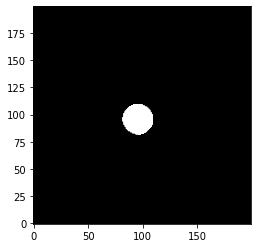

In [30]:
plt.figure()
fig, ax2 = plt.subplots(1)
ax2.imshow(flux_1, cmap = 'gray', vmin = 30, vmax = 300, origin = 'lower')

In [31]:
subimage = image_data[2358:2558, 451:651]
cenx, ceny = ndimage.measurements.center_of_mass(subimage)

def find_center(subimage, cenx, ceny, centerrad):
    
    x = np.linspace(1, 200, 200)
    y = np.linspace(1, 200, 200)
    
    cx = np.sum(x @ aperture(subimage, cenx, ceny, centerrad, sky(subimage, 35, 45, cenx, ceny))) / np.sum(flux_1)
    cy = np.sum(y @ aperture(subimage, cenx, ceny, centerrad, sky(subimage, 35, 45, cenx, ceny)).T) / np.sum(flux_1)
    
    return cx, cy

<ipython-input-31-7b4c13f6de24>:2: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cenx, ceny = ndimage.measurements.center_of_mass(subimage)


In [32]:
cenx_best, ceny_best = find_center(subimage, cenx, ceny, 14)
print(cenx_best, ceny_best)

96.61954310984973 96.53038035413532


In [33]:
# np.linspace(5,40,36)

# for i in (np.linspace(5,40,36)):
#     print(i)

In [34]:
aperture_flux = []
flux_diff = [0]
for i in np.linspace(5,80,36):
    
    flux = np.sum(aperture(subimage, cenx_best, ceny_best, i, sky(subimage, 85, 95, cenx_best, ceny_best)))
    aperture_flux.append(flux)
    
    diff = -flux_diff[-1] + flux
    flux_diff.append(diff)

Text(0.5, 1.0, '35 pixels as aperture radius')

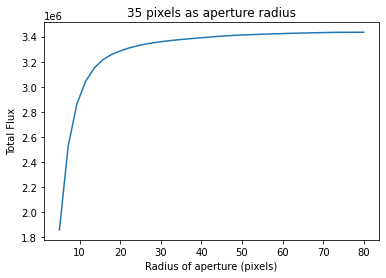

In [35]:
plt.plot(np.linspace(5,80,36), aperture_flux)
plt.xlabel('Radius of aperture (pixels)')
plt.ylabel('Total Flux')
plt.title('35 pixels as aperture radius')

<Figure size 432x288 with 0 Axes>

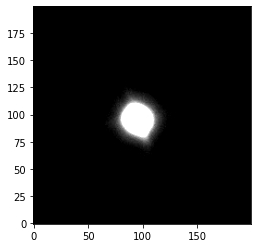

In [36]:
flux_1 = aperture(subimage, cenx_best, ceny_best, 35, sky(subimage, 75, 85, cenx_best, ceny_best))

plt.figure()
fig, ax2 = plt.subplots(1)
ax2.imshow(flux_1, cmap = 'gray', vmin = 30, vmax = 300, origin = 'lower')

### Timeseries photometry part 5

In [37]:
f = open('imlist.txt', 'r')
images = f.read().splitlines()
f.close()

nim = len(images)
fluxarray1 = []

In [38]:
for i in range(nim):
    
    image_data = fits.getdata(images[i])
    subimage = image_data[2358:2558, 451:651]
    
    cenx, ceny = ndimage.measurements.center_of_mass(subimage)
    
    cenx, ceny = find_center(subimage, cenx, ceny, 14)
    
    skyflux = sky(subimage, 75, 85, cenx, ceny)
    
    flux = aperture(subimage, cenx, ceny, 35, skyflux)
    
    fluxarray1.append(flux)

<ipython-input-38-82f8591c81da>:6: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cenx, ceny = ndimage.measurements.center_of_mass(subimage)


In [39]:
print(len(fluxarray1))

69


### Ref star 1

<ipython-input-60-1b6b6b031b02>:3: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cenx1, ceny1 = ndimage.measurements.center_of_mass(subimage1)


<Figure size 432x288 with 0 Axes>

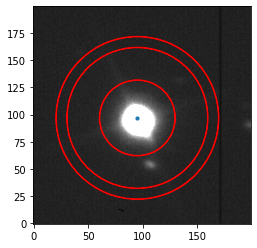

In [60]:
image_data = fits.getdata(images[0])
subimage1 = image_data[2520:2720, 97:297]
cenx1, ceny1 = ndimage.measurements.center_of_mass(subimage1)

plt.figure()
fig, ax2 = plt.subplots(1)
ax2.imshow(subimage, cmap = 'gray', vmin = -30, vmax = 300, origin = 'lower')
ax2.scatter(cenx1, ceny1, 10)
Aperture = Wedge((cenx1, ceny1), 35, 0, 360, width = 0.5, color = 'red')
SkyAnnulus1 = Wedge((cenx1, ceny1), 65, 0, 360, width = 0.5, color = 'red')
SkyAnnulus2 = Wedge((cenx1, ceny1), 75, 0, 360, width = 0.5, color = 'red')
ax2.add_patch(Aperture)
ax2.add_patch(SkyAnnulus1)
ax2.add_patch(SkyAnnulus2)

<Figure size 432x288 with 0 Axes>

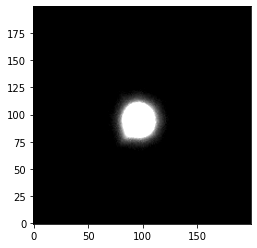

In [61]:
cenx1, ceny1 = find_center(subimage1, cenx1, ceny1, 35)

flux_1 = aperture(subimage1, cenx1, ceny1, 35, sky(subimage1, 75, 85, cenx1, ceny1))

plt.figure()
fig, ax2 = plt.subplots(1)
ax2.imshow(flux_1, cmap = 'gray', vmin = 35, vmax = 300, origin = 'lower')

In [62]:
aperture_flux1 = []
for i in np.linspace(5,80,36):
    
    flux1 = np.sum(aperture(subimage1, cenx1, ceny1, i, sky(subimage1, 75, 85, cenx1, ceny1)))
    aperture_flux1.append(flux1)

Text(0.5, 1.0, '35 pixels as aperture radius')

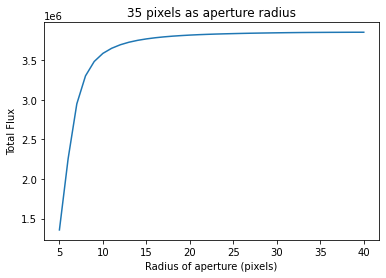

In [63]:
plt.plot(np.linspace(5,40,36), aperture_flux1)
plt.xlabel('Radius of aperture (pixels)')
plt.ylabel('Total Flux')
plt.title('35 pixels as aperture radius')

In [44]:
fluxarray2 = []

for i in range(nim):
    
    image_data = fits.getdata(images[i])
    subimage = image_data[2523:2723, 105:305]
    
    cenx, ceny = ndimage.measurements.center_of_mass(subimage)
    
    cenx, ceny = find_center(subimage, cenx, ceny, 35)
    
    skyflux = sky(subimage, 75, 85, cenx, ceny)
    
    flux = aperture(subimage, cenx, ceny, 35, skyflux)
    
    fluxarray2.append(flux)

<ipython-input-44-b4836c0a58c2>:8: DeprecationWarning: Please use `center_of_mass` from the `scipy.ndimage` namespace, the `scipy.ndimage.measurements` namespace is deprecated.
  cenx, ceny = ndimage.measurements.center_of_mass(subimage)


In [45]:
print(len(fluxarray2))

69


### Ref star 2

In [46]:
timearray = []

for i in range(len(raw)):

    fitsfile = fits.open(raw[i])
    time = fitsfile[0].header['MJD-OBS']
    
    timearray.append(time)
    
print(len(timearray))

69


In [47]:
print(timearray)


[59263.0353990085, 59263.0375147611, 59263.0396324322, 59263.0418306738, 59263.0439457186, 59263.0461536385, 59263.0482647605, 59263.0503773056, 59263.0524868406, 59263.0545970947, 59263.0568000115, 59263.0589130074, 59263.0610231422, 59263.063217476, 59263.0653278902, 59263.0675197989, 59263.0696277171, 59263.0717385486, 59263.0739369318, 59263.0760528073, 59263.0781635568, 59263.0803588033, 59263.0824723467, 59263.0845871344, 59263.086702846, 59263.0889071897, 59263.0910214707, 59263.0932226777, 59263.0953310132, 59263.0974448919, 59263.0995517299, 59263.1016624346, 59263.1037760973, 59263.1058845147, 59263.1079966351, 59263.1101335958, 59263.1122428477, 59263.1143602207, 59263.1164723337, 59263.1185850129, 59263.1207046732, 59263.122815758, 59263.1249252781, 59263.127055347, 59263.1291689426, 59263.1312836856, 59263.1334000528, 59263.135515511, 59263.1376304775, 59263.1397398263, 59263.1418511719, 59263.1439644247, 59263.1460780054, 59263.1481869668, 59263.1503015608, 59263.15251642

### Relative Photometry part 6

In [48]:
rel_flux = np.zeros(len(timearray))

for i in range(len(fluxarray1)):
    
    relflux = np.sum(fluxarray1[i]) / np.sum(fluxarray2[i])
    
    rel_flux[i] = relflux

In [49]:
print((rel_flux))

[0.89577619 0.89653383 0.89751761 0.89737735 0.89687867 0.89711653
 0.89615075 0.89671804 0.89552296 0.89514694 0.89674636 0.89622534
 0.8968582  0.89676111 0.89894309 0.8968943  0.89476966 0.89499097
 0.89153231 0.89053759 0.88858974 0.88653668 0.88726529 0.88471046
 0.88242297 0.88590686 0.8864231  0.88501146 0.88447593 0.88534759
 0.88615564 0.88612868 0.88412945 0.88520393 0.88425273 0.88510196
 0.88376551 0.88397796 0.88455606 0.88350832 0.88335032 0.88331245
 0.88509763 0.8851101  0.8842939  0.88482825 0.88561973 0.88415086
 0.88651748 0.88544182 0.88653075 0.88896294 0.89109165 0.89217826
 0.89251735 0.89749454 0.89771132 0.89527566 0.89431963 0.902793
 0.89687413 0.89559415 0.89446404 0.89349789 0.89384505 0.89465146
 0.89386099 0.89224213 0.89440743]


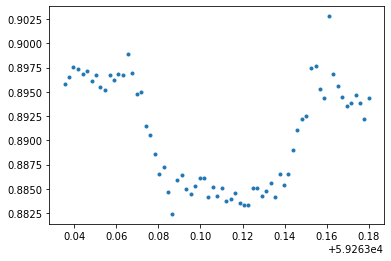

In [50]:
plt.plot(timearray, rel_flux, '.')

In [51]:
timearray_frac = np.array([x - 5.9263e4 for x in timearray])
#print(timearray_frac)
timearray = np.array(timearray)

out_of_transit = np.where(timearray_frac < 0.073)[0].tolist() + np.where(timearray_frac > 0.152)[0].tolist()
avg_oot = np.mean(np.array(rel_flux)[out_of_transit])

print(out_of_transit)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]


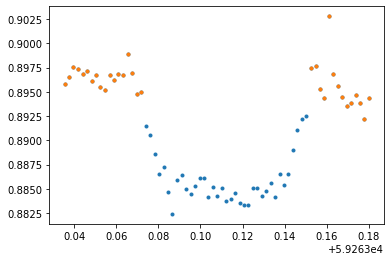

In [52]:
plt.plot(timearray, rel_flux, '.')
plt.plot(np.array(timearray)[out_of_transit], np.array(rel_flux)[out_of_transit], '.')

In [54]:
outfile = 'lightcurve.dat'
of = open(outfile, 'w')
for i in range(nim):
    of.write('%15.6f %15.6f' % (timearray[i], rel_flux_norm[i]))
of.close()

In [55]:
## Transit depth

t2= 23
t3 = 49

in_transit_flux = np.mean(rel_flux_norm[t2:t3+1])

print(in_transit_flux)

depth = 1 - in_transit_flux
print('Transit depth:',depth)

0.9873995029355115
Transit depth: 0.012600497064488514


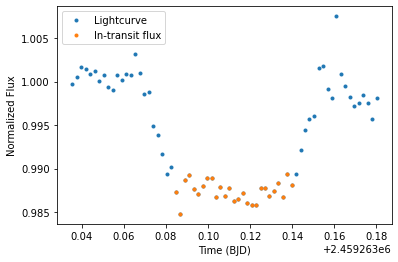

In [59]:
rel_flux_norm = np.array(rel_flux) / avg_oot

plt.plot(timearray + 2400000, rel_flux_norm, '.', label = 'Lightcurve')
plt.plot(timearray[t2:t3+1]+ 2400000, rel_flux_norm[t2:t3+1], '.', label = 'In-transit flux')
plt.xlabel('Time (BJD)')
plt.ylabel('Normalized Flux')
plt.legend()

In [57]:
r_s = 0.9 * 696340/69911  ## Solar radius in terms of jupitr radius
e_r_s = 0.11 * 696340/69911

r_p = depth ** .5 * r_s

e_r_p = r_p * e_r_s / r_s

print('Radius of WASP-49b:', round(r_p, 4), '+-', round(e_r_p, 4), 'Rjup')

t14 = 0.152 - 0.07  ## days
t23 = 0.14 - 0.082  ## days

a = 0.9 * 0.00465047 * 2 * 2.78 / np.pi * depth ** .25 / (t14 **2 - t23 **2) ** .5

print('Semi-major axis:', round(a, 4), 'AU')


temp_star = 5600
temp_eq = temp_star * (0.9 * 0.00465047 / 2 / a) ** .5

print('Teq:', round(temp_eq, 4), 'K')

Radius of WASP-49b: 1.0063 +- 0.123 Rjup
Semi-major axis: 0.0428 AU
Teq: 1238.0749 K
